# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

#print(api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set up lists to hold reponse info
citys =[]
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

In [4]:
# URL for GET requests to retrieve weather data
url = "https://api.openweathermap.org/data/2.5/weather?q={cities}&APPID={key}"
# Make a request for each of the indices
for cty in cities:
    #print(f"Making request for City: {cty}")

    # Get one of the posts
    response = requests.get(url.format(cities=cty,key=api_key)).json()

    # Save post's JSON
    #print(response)
    if response['cod'] == 200:
        #print(cty)
        if ((response['coord']['lat'] != "")
            and (response['main']['temp'] != "")
            and (response['main']['humidity'] != "")
            and (response['clouds']['all'] != "")
            and (response['wind']['speed']) != ""):
                citys.append(cty)
                lat.append(response['coord']['lat'])
                temp.append(response['main']['temp'])
                humidity.append(response['main']['humidity'])
                cloudiness.append(response['clouds']['all'])
                wind_speed.append(response['wind']['speed'])


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
print(len(citys))
print(len(lat))
print(len(temp))
print(len(humidity))
print(len(cloudiness))
print(len(wind_speed))

city_dict = {
    "city": citys,
    "lat": lat,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}
city_data = pd.DataFrame(city_dict)
city_data.head()

542
542
542
542
542
542


,city,lat,temp,humidity,cloudiness,wind_speed
0,rikitea,-23.12,296.60,88,99,1.21
1,yellowknife,62.45,285.00,76,75,5.10
2,kaitangata,-46.28,285.37,68,0,3.13
3,listvyanskiy,54.44,285.10,63,12,6.15
4,georgetown,6.80,299.15,94,40,2.10


In [6]:
# Export file as a CSV, without the Pandas index, but with the header
city_data.to_csv(output_data_file, index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

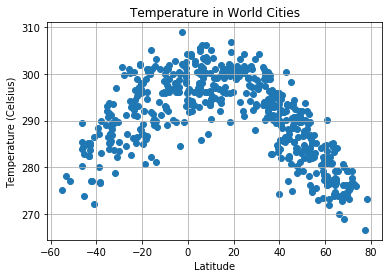

In [7]:
# Build a scatter plot for each data type
plt.scatter(city_data["lat"], city_data["temp"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

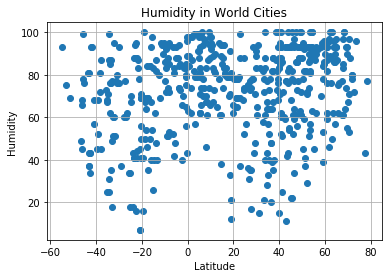

In [8]:
# Build a scatter plot for each data type
plt.scatter(city_data["lat"], city_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

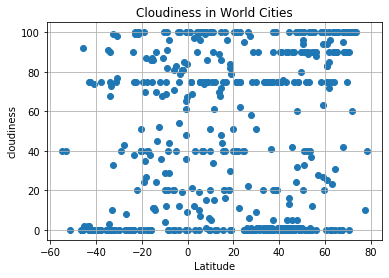

In [9]:
# Build a scatter plot for each data type
plt.scatter(city_data["lat"], city_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

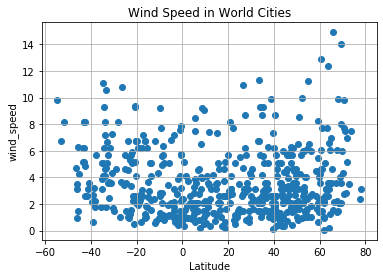

In [10]:
# Build a scatter plot for each data type
plt.scatter(city_data["lat"], city_data["wind_speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("wind_speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInWorldCities.png")

# Show plot
plt.show()